In [2]:
import pandas as pd
import numpy as np
from functools import reduce

import seaborn as sns

import sys
import os

sys.path.append(os.path.relpath("../../huygens"))
sys.path.append(os.path.relpath("../../galileo"))

import galileo as gal
import huygens as huy

In [3]:
def concat_cols(df, cols, delim):
    cols_str = [df[x].astype(str) for x in cols]

    return reduce(lambda a, b: a + delim + b, cols_str)

In [4]:
tcga_genex = pd.read_hdf("../../data/processed/TCGA/TCGA_genex_norm.h5",key="tcga_genex")

normal_genex = tcga_genex[tcga_genex.index.map(lambda x: x[-2:] == "11")]

tcga_genex = tcga_genex[tcga_genex.index.map(lambda x: x[-2:] != "11")]

In [33]:
tcga_splicing = pd.read_hdf("../../data/processed/TCGA/merged.h5",key="tcga_splicing")


tcga_splicing.index = tcga_splicing.index.map(lambda x: x[:15])

tcga_splicing = tcga_splicing[~tcga_splicing.index.duplicated(keep="first")]

tcga_splicing = tcga_splicing[tcga_splicing.index.map(lambda x: x[-2:] != "11")]

# RPL22 CN vs splicing

In [20]:
tcga_cn = pd.read_hdf("../../data/processed/TCGA/tcga_cn.hdf", key="tcga_cn")
tcga_cn = tcga_cn[tcga_cn.index.map(lambda x: x[-2:] != "11")]

In [26]:
rpl22_cn_splicing = gal.mat_corrs_naive(
    tcga_cn["RPL22"], tcga_splicing, method="spearman",pbar=True)

rpl22_cn_splicing.to_hdf(
    "../data/intermediate/rpl22_cn_splicing.h5", key="rpl22_cn_splicing", mode="w")

/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/khu/anaconda3/envs/cenv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Splicing and expression correlations

## RPL22L1 expression vs splicing

In [27]:
rpl22l1_genex_splicing = gal.mat_corrs_naive(tcga_genex["RPL22L1_15209"],
                                           tcga_splicing,
                                           method="spearman",
                                           pbar=True
                                          )

rpl22l1_genex_splicing.to_hdf("../data/intermediate/rpl22l1_genex_splicing.h5",key="rpl22l1_genex_splicing",mode="w")

In [28]:
rpl22l1_genex_splicing_subtyped = gal.mat_corrs_subtyped(tcga_genex["RPL22L1_15209"],
                                                         tcga_splicing,
                                                         tcga_sample_info["abbreviated_disease"],
                                                         pbar=True,
                                                         stack=True,
                                                         min_count=50,
                                                         method="spearman"
                                                         )

rpl22l1_genex_splicing_subtyped.to_hdf("../data/intermediate/rpl22l1_genex_splicing_subtyped.h5",
                                       key="rpl22l1_genex_splicing_subtyped",
                                       mode="w")

## Splicing vs gene expression

In [29]:
mdm4_splicing_genex = gal.mat_corrs_naive(tcga_splicing["MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"],
                                          tcga_genex,
                                          pbar=True,
                                          method="spearman"
                                          )

rpl22l1_splicing_genex = gal.mat_corrs_naive(tcga_splicing["RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"],
                                             tcga_genex,
                                             pbar=True,
                                             method="spearman"
                                             )

mdm4_splicing_genex.to_hdf(
    "../data/intermediate/mdm4_splicing_genex.h5", key="mdm4_splicing_genex", mode="w")

rpl22l1_splicing_genex.to_hdf(
    "../data/intermediate/rpl22l1_splicing_genex.h5", key="rpl22l1_splicing_genex", mode="w")


In [30]:
mdm4_splicing_genex_subtyped = gal.mat_corrs_subtyped(tcga_splicing["MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"],
                                               tcga_genex,
                                               tcga_sample_info["abbreviated_disease"],
                                               pbar=True,
                                               stack=True,
                                               min_count=50,
                                               method="spearman"
                                               )

rpl22l1_splicing_genex_subtyped = gal.mat_corrs_subtyped(tcga_splicing["RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"],
                                                  tcga_genex,
                                                  tcga_sample_info["abbreviated_disease"],
                                                  pbar=True,
                                                  stack=True,
                                                  min_count=50,
                                                  method="spearman"
                                                  )

mdm4_splicing_genex_subtyped.to_hdf(
    "../data/intermediate/mdm4_splicing_genex_subtyped.h5", key="mdm4_splicing_genex_subtyped", mode="w")
rpl22l1_splicing_genex_subtyped.to_hdf(
    "../data/intermediate/rpl22l1_splicing_genex_subtyped.h5", key="rpl22l1_splicing_genex_subtyped", mode="w")


# Co-splicing correlations

In [31]:
mdm4_cosplicing = gal.mat_corrs_naive(tcga_splicing["MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"],
                                      tcga_splicing,
                                      pbar=True,
                                      method="spearman"
                                      )

rpl22l1_cosplicing = gal.mat_corrs_naive(tcga_splicing["RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"],
                                         tcga_splicing,
                                         pbar=True,
                                         method="spearman"
                                         )

mdm4_cosplicing.to_hdf(
    "../data/intermediate/mdm4_cosplicing.h5", key="mdm4_cosplicing", mode="w")

rpl22l1_cosplicing.to_hdf(
    "../data/intermediate/rpl22l1_cosplicing.h5", key="rpl22l1_cosplicing", mode="w")

In [32]:
mdm4_cosplicing_subtyped = gal.mat_corrs_subtyped(tcga_splicing["MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"],
                                                  tcga_splicing,
                                                  tcga_sample_info["abbreviated_disease"],
                                                  pbar=True,
                                                  stack=True,
                                                  min_count=50,
                                                  method="spearman"
                                                  )

rpl22l1_cosplicing_subtyped = gal.mat_corrs_subtyped(tcga_splicing["RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"],
                                                     tcga_splicing,
                                                     tcga_sample_info["abbreviated_disease"],
                                                     pbar=True,
                                                     stack=True,
                                                     min_count=50,
                                                     method="spearman"
                                                     )

mdm4_cosplicing_subtyped.to_hdf(
    "../data/intermediate/mdm4_cosplicing_subtyped.h5", key="mdm4_cosplicing_subtyped", mode="w")
rpl22l1_cosplicing_subtyped.to_hdf(
    "../data/intermediate/rpl22l1_cosplicing_subtyped.h5", key="rpl22l1_cosplicing_subtyped", mode="w")

# RPL22 mutation correlations

In [6]:
rpl22_tcga = pd.read_csv("../data/raw/rpl22.tcga.data.csv")

rpl22_tcga = rpl22_tcga.dropna(subset=["sampleid"])
rpl22_tcga = rpl22_tcga.set_index("sampleid")
rpl22_tcga.index = rpl22_tcga.index.map(lambda x: x[:15])

rpl22_mut = rpl22_tcga["rpl22mut.mc3.k15"].dropna()

Odds ratio: 471.5365579302587
P-value: 2.8051187737877797e-277


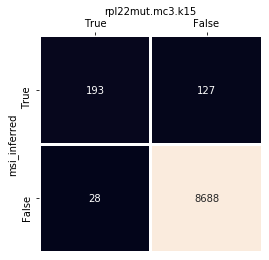

In [43]:
huy.binary_contingency(rpl22_tcga["msi_inferred"],rpl22_tcga["rpl22mut.mc3.k15"])

## Overall

In [36]:
rpl22_msi_splicing = gal.mat_mwus_naive(tcga_splicing, msi_pos["rpl22mut.mc3.k15"], pbar=True)

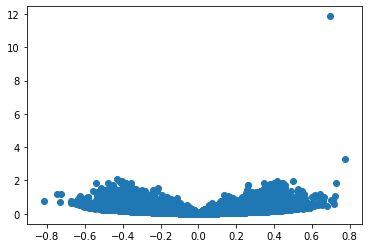

In [40]:
subset = rpl22_msi_splicing[rpl22_msi_splicing["pos_n"]>=10]
subset = subset[subset["neg_n"]>=10]

plt.scatter(subset["corr"],subset["qval"])

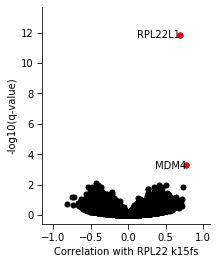

In [49]:
labels = pd.Series(subset.index.map(
            lambda x: x.split("_")[0]), index=subset.index)

plt.figure(figsize=(3,4))
ax = plt.subplot(111)

huy.dense_plot(subset["corr"],
               subset["qval"],
               labels_mask=subset["qval"] > 3,
               labels=labels,
               adjust=False,
               ax=ax,
               c="black"
               )

plt.xlabel("Correlation with RPL22 k15fs")
plt.ylabel("-log10(q-value)")

plt.savefig("../plots/TCGA-MSI_RPL22_truncated_splicing.pdf",dpi=512,transparent=True,bbox_inches="tight")

In [52]:
tcga_sample_info = pd.read_hdf("../../data/processed/TCGA/tcga_sample_info.hdf",key="tcga_sample_info")

In [41]:
subtype_labels = pd.Series(subtype_corrs.index.map(
            lambda x: x.split("_")[0]), index=subtype_corrs.index)

,corr,pval,pos_n,neg_n,qval
RPL22L1_ENSG00000163584_ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.696643,17.013234,124.0,86.0,11.848304
MDM4_ENSG00000198625_ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625,0.775063,8.126172,57.0,28.0,3.262273
LIN37_ENSG00000267796_ENSG00000267796.3_A5_19_36244917:36245058:36243987:36244094:36243987:36244154_36244094:36244154,-0.429450,6.794241,122.0,84.0,2.106433
HNRNPH1_ENSG00000169045_ENSG00000169045.13_A5_5_179050144:179050165:179050636:179050647:179050595:179050647_179050595:179050636,0.416043,6.419333,121.0,85.0,1.961030
RECQL4_ENSG00000160957_ENSG00000160957.8_IR_8_145736666:145738521:145738799:145738864_145738521:145738799,-0.421178,6.351965,121.0,80.0,1.961030
PRKDC_ENSG00000253729_ENSG00000253729.3_IR_8_48805699:48805814:48805816:48805947_48805814:48805816,0.502767,6.257374,87.0,54.0,1.961030
CSDE1_ENSG00000009307_ENSG00000009307.11_ES_1_115279378:115279476:115280091:115280184:115280583:115280675_115280091:115280184,-0.413929,6.238967,121.0,82.0,1.961030
MRPL4_ENSG00000105364_ENSG00000105364.9_IR_19_10369088:10369198:10369284:10369343_10369198:10369284,-0.405476,6.222870,124.0,86.0,1.961030
ALDOA_ENSG00000149925_ENSG00000149925.12_A5_16_30078770:30078786:30078554:30078654:30078554:30078687_30078654:30078687,-0.400225,6.078321,124.0,86.0,1.868455
UBAP2L_ENSG00000143569_ENSG00000143569.14_ES_1_154241382:154241430:154241837:154241888:154242675:154243040_154241837:154241888,-0.398457,5.956511,122.0,85.0,1.868455


In [11]:
t2g = pd.read_csv("../data/intermediate/sleuth_diff/ensembl_t2g.csv")
t2g["format_gene_id"] = t2g["hgnc_gene"].fillna("") + "_" + t2g["ens_gene"]

format_gene_map = dict(zip(t2g["ens_gene"],t2g["format_gene_id"]))

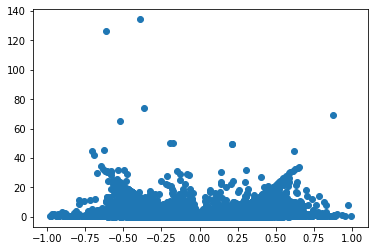

In [17]:
import matplotlib.pyplot as plt
plt.scatter(rpl22_mut_splicing["corr"],rpl22_mut_splicing["qval"])